In [1]:
import pandas as pd
import numpy as np
import os
import sys
import gget
import matplotlib.pyplot as plt
import seaborn as sns
import gseapy as gp
import glob

In [2]:
samples = {'Barcode' : ['bc1', 'bc2', 'bc3', 'bc4', 'bc5', 'bc6', 'bc7', 'bc8', 'bc9', 'bc10', 'bc11', 'bc12', 'bc13', 'bc14', 'bc15'],
           'Group' : ['Young_D28', 'Young_D28', 'Young_D28', 'Young_D14', 'Young_D14', 'OA_D14', 'OA_D14', 'Young_D28',
                          'Young_D28', 'OA_D28', 'OA_D28', 'Young_D14', 'Young_D28', 'OA_D14', 'OA_D28'],
           #'Replicate' : ['extra', 'extra', 'extra', 2, 3, 1, 3, 1, 3, 2, 'extra', 1, 2, 2, 1],
          }

samples = pd.DataFrame.from_dict(samples)

samples 

,Barcode,Group
0,bc1,Young_D28
1,bc2,Young_D28
2,bc3,Young_D28
3,bc4,Young_D14
4,bc5,Young_D14
5,bc6,OA_D14
6,bc7,OA_D14
7,bc8,Young_D28
8,bc9,Young_D28
9,bc10,OA_D28


In [3]:
dpath = "/scratch/indikar_root/indikar1/shared_data/chondroform/pipeline_outputs/count_matrix/"
file_list = glob.glob(f"{dpath}*")

result = []

for fpath in file_list:
    basename = os.path.basename(fpath).replace(".counts.tsv", "")
    tmp = pd.read_csv(fpath, sep='\t')
    tmp.columns = ['gene_id', 'gene_name', basename]
    
    tmp = tmp.set_index(['gene_id', 'gene_name'])
    result.append(tmp)
    
    
res = pd.concat(result, axis=1, ignore_index=False)
res = res.reset_index()

res['bc1_3'] = res[['bc1', 'bc2', 'bc3']].mean(axis=1).round().astype(int)
res.drop(columns=['bc1', 'bc2', 'bc3'], inplace=True)

print(f"{res.shape=}")
res.head()

res.shape=(63246, 15)


,gene_id,gene_name,bc14,bc13,bc5,bc9,bc8,bc4,bc10,bc12,bc15,bc6,bc11,bc7,bc1_3
0,ENSG00000000003,TSPAN6,90,116,308,271,267,184,138,150,69,130,129,190,232
1,ENSG00000000005,TNMD,0,0,1,0,0,1,0,2,0,0,0,0,0
2,ENSG00000000419,DPM1,134,117,352,293,401,246,195,174,133,182,192,269,280
3,ENSG00000000457,SCYL3,39,43,47,53,89,38,81,19,36,40,75,48,66
4,ENSG00000000460,FIRRM,20,37,47,80,135,44,72,22,67,39,72,43,87


## Files for Rhima (12/19/24)

In [6]:
# Drop rows with 0 counts across all samples

row_sums = res.iloc[:, 2:].sum(axis=1)
res = res[row_sums != 0]
print(f"{res.shape=}")
res.head()

res.shape=(25058, 15)


,gene_id,gene_name,bc14,bc13,bc5,bc9,bc8,bc4,bc10,bc12,bc15,bc6,bc11,bc7,bc1_3
0,ENSG00000000003,TSPAN6,90,116,308,271,267,184,138,150,69,130,129,190,232
1,ENSG00000000005,TNMD,0,0,1,0,0,1,0,2,0,0,0,0,0
2,ENSG00000000419,DPM1,134,117,352,293,401,246,195,174,133,182,192,269,280
3,ENSG00000000457,SCYL3,39,43,47,53,89,38,81,19,36,40,75,48,66
4,ENSG00000000460,FIRRM,20,37,47,80,135,44,72,22,67,39,72,43,87


In [10]:
geneNamePath = "/nfs/turbo/umms-indikar/shared/projects/directRNA/updated_reference/geneNames111.csv"

gdf = pd.read_csv(geneNamePath, low_memory=False)
gdf = gdf[gdf['Feature'] == 'gene']
gdf = gdf[['gene_id', 'gene_name', 'gene_biotype', 'Start', 'End', 'Chromosome']]
gdf = gdf[gdf['gene_name'].notna()].reset_index(drop=True)

gdf['Length'] = gdf['End'] - gdf['Start']

print(f"{gdf.shape=}")
gdf.head()

gdf.shape=(42640, 7)


,gene_id,gene_name,gene_biotype,Start,End,Chromosome,Length
0,ENSG00000279928,DDX11L17,unprocessed_pseudogene,182695,184174,1,1479
1,ENSG00000142611,PRDM16,protein_coding,3069167,3438621,1,369454
2,ENSG00000142655,PEX14,protein_coding,10472287,10630758,1,158471
3,ENSG00000232596,LINC01646,lncRNA,4571480,4594016,1,22536
4,ENSG00000235054,LINC01777,lncRNA,4412026,4424689,1,12663


In [28]:
result = pd.merge(res, gdf,
                  how='left',
                  left_on=['gene_id', 'gene_name'],
                  right_on=['gene_id', 'gene_name'],
                 )

print(f"{result.shape=}")
result.head()

result.shape=(25058, 20)


,gene_id,gene_name,bc14,bc13,bc5,bc9,bc8,bc4,bc10,bc12,bc15,bc6,bc11,bc7,bc1_3,gene_biotype,Start,End,Chromosome,Length
0,ENSG00000000003,TSPAN6,90,116,308,271,267,184,138,150,69,130,129,190,232,protein_coding,100627107.0,100639991.0,X,12884.0
1,ENSG00000000005,TNMD,0,0,1,0,0,1,0,2,0,0,0,0,0,protein_coding,100584935.0,100599885.0,X,14950.0
2,ENSG00000000419,DPM1,134,117,352,293,401,246,195,174,133,182,192,269,280,protein_coding,50934866.0,50959140.0,20,24274.0
3,ENSG00000000457,SCYL3,39,43,47,53,89,38,81,19,36,40,75,48,66,protein_coding,169849630.0,169894267.0,1,44637.0
4,ENSG00000000460,FIRRM,20,37,47,80,135,44,72,22,67,39,72,43,87,protein_coding,169662006.0,169854080.0,1,192074.0


In [29]:
raw_counts = result.drop(columns=['Start', 'End'])

raw_counts.rename(columns={'bc1_3': 'Y-d28-rep1', 'bc4': 'Y-d14-rep1', 'bc5': 'Y-d14-rep2', 'bc6': 'OA-d14-rep1', 'bc7': 'OA-d14-rep2', 'bc8': 'Y-d28-rep2',
                           'bc9': 'Y-d28-rep3', 'bc10': 'OA-d28-rep1', 'bc11': 'OA-d28-rep2', 'bc12': 'Y-d14-rep3', 'bc13': 'Y-d28-rep4', 'bc14': 'OA-d14-rep3', 'bc15': 'OA-d28-rep3'},
                  inplace=True)

cols = raw_counts.columns[2:15]
other_cols = raw_counts.columns.difference(cols, sort=False)
new_cols = list(other_cols) + list(cols)
raw_counts = raw_counts[new_cols]

print(f"{raw_counts.shape=}")
raw_counts.head()

raw_counts.shape=(25058, 18)


,gene_id,gene_name,gene_biotype,Chromosome,Length,OA-d14-rep3,Y-d28-rep4,Y-d14-rep2,Y-d28-rep3,Y-d28-rep2,Y-d14-rep1,OA-d28-rep1,Y-d14-rep3,OA-d28-rep3,OA-d14-rep1,OA-d28-rep2,OA-d14-rep2,Y-d28-rep1
0,ENSG00000000003,TSPAN6,protein_coding,X,12884.0,90,116,308,271,267,184,138,150,69,130,129,190,232
1,ENSG00000000005,TNMD,protein_coding,X,14950.0,0,0,1,0,0,1,0,2,0,0,0,0,0
2,ENSG00000000419,DPM1,protein_coding,20,24274.0,134,117,352,293,401,246,195,174,133,182,192,269,280
3,ENSG00000000457,SCYL3,protein_coding,1,44637.0,39,43,47,53,89,38,81,19,36,40,75,48,66
4,ENSG00000000460,FIRRM,protein_coding,1,192074.0,20,37,47,80,135,44,72,22,67,39,72,43,87


In [24]:
# Calculate TPM

count_cols = raw_counts.columns[5:]
lengths_kb = raw_counts['Length'] / 1000

rpk = raw_counts[count_cols].div(lengths_kb, axis=0)
scaling_factors = rpk.sum(axis=0)
tpm = rpk.div(scaling_factors, axis=1) * 1e6

tpm_counts = pd.concat([raw_counts.iloc[:, :5], tpm], axis=1)

tpm_counts.drop(columns={'Length'}, inplace=True)

print(f"{tpm_counts.shape=}")
tpm_counts.head()

tpm_counts.shape=(25058, 17)


,gene_id,gene_name,gene_biotype,Chromosome,OA-d14-rep3,Y-d28-rep4,Y-d14-rep2,Y-d28-rep3,Y-d28-rep2,Y-d14-rep1,OA-d28-rep1,Y-d14-rep3,OA-d28-rep3,OA-d14-rep1,OA-d28-rep2,OA-d14-rep2,Y-d28-rep1
0,ENSG00000000003,TSPAN6,protein_coding,X,3.595028,6.814700,10.212863,14.540466,7.493671,8.892917,6.740960,6.527665,2.749012,4.307506,5.869760,5.634366,12.249265
1,ENSG00000000005,TNMD,protein_coding,X,0.000000,0.000000,0.028576,0.000000,0.000000,0.041652,0.000000,0.075008,0.000000,0.000000,0.000000,0.000000,0.000000
2,ENSG00000000419,DPM1,protein_coding,20,2.841018,3.648245,6.195107,8.344225,5.973613,6.310603,5.055762,4.019067,2.812474,3.200835,4.637044,4.234022,7.846743
3,ENSG00000000457,SCYL3,protein_coding,1,0.449656,0.729143,0.449832,0.820806,0.720990,0.530110,1.142046,0.238658,0.413986,0.382559,0.985026,0.410855,1.005823
4,ENSG00000000460,FIRRM,protein_coding,1,0.053589,0.145805,0.104539,0.287926,0.254155,0.142647,0.235916,0.064220,0.179054,0.086682,0.219758,0.085535,0.308123


In [26]:
tpm_counts.to_csv("/home/jrcwycy/iChon2024/New_YvsO/YoungvsOA_TPMcounts.csv")

In [25]:
raw_counts.drop(columns={'Length'}, inplace=True)

print(f"{raw_counts.shape=}")

raw_counts.shape=(25058, 17)


In [27]:
raw_counts.to_csv("/home/jrcwycy/iChon2024/New_YvsO/YoungvsOA_RawCounts.csv")

In [5]:
path = "/scratch/indikar_root/indikar1/shared_data/chondroform/pipeline_outputs/count_matrix/bc9.counts.tsv"

df = pd.read_csv(path, sep='\t')

df.head()

,Unnamed: 0,Unnamed: 1,/scratch/indikar_root/indikar1/shared_data/chondroform/pipeline_outputs/mapping/bc9.bam
0,ENSG00000000003,TSPAN6,271
1,ENSG00000000005,TNMD,0
2,ENSG00000000419,DPM1,293
3,ENSG00000000457,SCYL3,53
4,ENSG00000000460,FIRRM,80


In [13]:
dpath = "/scratch/indikar_root/indikar1/shared_data/chondroform/pipeline_outputs/count_matrix/"
file_list = glob.glob(f"{dpath}*")

p = 1000 # kilobase pair resolution on gene length

result = []

for fpath in file_list:
    basename = os.path.basename(fpath).replace(".counts.tsv", "")
    tmp = pd.read_csv(fpath, sep='\t')
    tmp.columns = ['gene_id', 'gene_name', 'read_count']
    
    tmp.drop('gene_name', axis=1, inplace=True)
    
    tmp = pd.merge(tmp, gdf, 
                   how='left', 
                   left_on='gene_id',
                   right_on='gene_id')
    
    # filter missing mappings
    tmp = tmp[tmp['gene_name'].notna()].reset_index(drop=True)

    # normalize expression (TPM)    
    tmp['RPK'] = tmp['read_count'] / (tmp['Length'] / p)
    scaling_factor = (tmp['RPK'].sum())/1e6
    tmp['TPM'] = tmp['RPK']/scaling_factor

    tmp['file'] = basename

    tmp = tmp[['gene_id', 'gene_name', 'gene_biotype', 'Length', 'file', 'read_count', 'TPM']]
    
    result.append(tmp)

    
result = pd.concat(result)

# Remove 0 read counts
result = result[result['read_count'] > 0]

result['log2(TPM+1)'] = np.log2(result['TPM'] + 1)
result['log(TPM+1)'] = np.log1p(result['TPM'])

print(f"{result.shape=}")
result.head()

# res['bc1_3'] = res[['bc1', 'bc2', 'bc3']].mean(axis=1).round().astype(int)
# res.drop(columns=['bc1', 'bc2', 'bc3'], inplace=True)

# print(f"{res.shape=}")
# res.head()

result.shape=(214485, 9)


,gene_id,gene_name,gene_biotype,Length,file,read_count,TPM,log2(TPM+1),log(TPM+1)
0,ENSG00000000003,TSPAN6,protein_coding,12884.0,bc1,252,11.904076,3.689755,2.557543
2,ENSG00000000419,DPM1,protein_coding,24274.0,bc1,356,8.925951,3.311205,2.295153
3,ENSG00000000457,SCYL3,protein_coding,44637.0,bc1,78,1.063520,1.045107,0.724413
4,ENSG00000000460,FIRRM,protein_coding,192074.0,bc1,92,0.291518,0.369068,0.255818
7,ENSG00000001036,FUCA2,protein_coding,16909.0,bc1,56,2.015654,1.592471,1.103817


In [16]:
res = pd.merge(result, samples,
               how='left',
               left_on='file',
               right_on='Barcode')

mapper1 = {'Young_D28' : 'Young', 'OA_D28' : 'OA', 'Young_D14' : 'Young', 'OA_D14' : 'OA'}
mapper2 = {'Young_D28' : 'D28', 'OA_D28' : 'D28', 'Young_D14' : 'D14', 'OA_D14' : 'D14'}


res['Condition'] = res['Group'].map(mapper1)
res['Time'] = res['Group'].map(mapper2)

print(f"{res.shape=}")
res.head()

res.shape=(214485, 13)


,gene_id,gene_name,gene_biotype,Length,file,read_count,TPM,log2(TPM+1),log(TPM+1),Barcode,Group,Condition,Time
0,ENSG00000000003,TSPAN6,protein_coding,12884.0,bc1,252,11.904076,3.689755,2.557543,bc1,Young_D28,Young,D28
1,ENSG00000000419,DPM1,protein_coding,24274.0,bc1,356,8.925951,3.311205,2.295153,bc1,Young_D28,Young,D28
2,ENSG00000000457,SCYL3,protein_coding,44637.0,bc1,78,1.063520,1.045107,0.724413,bc1,Young_D28,Young,D28
3,ENSG00000000460,FIRRM,protein_coding,192074.0,bc1,92,0.291518,0.369068,0.255818,bc1,Young_D28,Young,D28
4,ENSG00000001036,FUCA2,protein_coding,16909.0,bc1,56,2.015654,1.592471,1.103817,bc1,Young_D28,Young,D28


In [54]:
adam = res[res['gene_name'] == 'ADAMTS5']

print(f"{adam.shape=}")
adam.head()

adam.shape=(4, 13)


,gene_id,gene_name,gene_biotype,Length,file,read_count,TPM,log2(TPM+1),log(TPM+1),Barcode,Group,Condition,Time
7148,ENSG00000154736,ADAMTS5,protein_coding,49167.0,bc1,2,0.024757,0.035282,0.024456,bc1,Young_D28,Young,D28
49674,ENSG00000154736,ADAMTS5,protein_coding,49167.0,bc5,1,0.008689,0.012482,0.008652,bc5,Young_D14,Young,D14
136614,ENSG00000154736,ADAMTS5,protein_coding,49167.0,bc12,4,0.045615,0.064351,0.044605,bc12,Young_D14,Young,D14
207032,ENSG00000154736,ADAMTS5,protein_coding,49167.0,bc7,2,0.015542,0.022249,0.015422,bc7,OA_D14,OA,D14


In [29]:
df = res.copy()

df = df[df['gene_biotype'] == 'protein_coding']
print(f"{df.shape=}")

df = df.pivot(index='gene_name', columns='file', values='log2(TPM+1)') # Set values to whichever normalization method 
df = df.fillna(0)

# Take average of bc1-bc3 since technical replicate
df['bc1_3'] = df[['bc1', 'bc2', 'bc3']].mean(axis=1)
df.drop(columns=['bc1', 'bc2', 'bc3'], inplace=True)

# Add sample info for plotting
df = df.T

day = ['D28'] * 2 + ['D14'] + ['D28'] + ['D14'] + ['D28'] + ['D14'] * 4 + ['D28'] * 3
group = ['OA'] * 2 + ['Young'] * 2 + ['OA'] * 2 + ['Young'] * 2 + ['OA'] * 2 + ['Young'] * 3

sample_info = pd.DataFrame({
    'Sample': df.index,
    'Group': group,
    'Day': day
})

df = df.merge(sample_info, left_index=True, right_on='Sample')

print(f"{df.shape=}")
df.head()

df.shape=(181687, 13)
df.shape=(13, 14861)


,A1BG,A2M,A2ML1,AAAS,AACS,AADAT,AAGAB,AAK1,AAMDC,AAMP,...,ZXDA,ZXDB,ZXDC,ZYG11B,ZYX,ZZEF1,ZZZ3,Sample,Group,Day
0,0.000000,0.055024,0.0,1.525993,0.195879,0.310248,0.187133,0.162552,2.346777,3.373266,...,0.459886,0.298936,0.317930,2.989739,3.898355,0.070326,0.222105,bc10,OA,D28
1,0.000000,0.000000,0.0,0.827433,0.063715,0.026622,0.090185,0.034761,2.126720,2.639840,...,0.159078,0.514941,0.085753,3.427184,1.708968,0.036160,0.107712,bc11,OA,D28
2,0.000000,0.000000,0.0,0.799709,0.221001,0.099292,0.194027,0.044182,2.205437,2.494094,...,0.152495,0.000000,0.159812,3.398155,2.201053,0.011627,0.127860,bc12,Young,D14
3,0.125689,0.044282,0.0,1.204346,0.196286,0.067764,0.187523,0.130217,2.147214,3.109623,...,0.202270,0.501156,0.236222,3.576694,3.160503,0.007858,0.170058,bc13,Young,D28
4,0.000000,0.103233,0.0,1.238702,0.110067,0.113364,0.202899,0.083341,2.086385,3.099440,...,0.386268,0.730280,0.232324,3.332030,3.122069,0.088319,0.156830,bc14,OA,D14


In [36]:
import Analysis as an

In [50]:
def plot_genes(genes, max_num_genes, data):
    """
    Plots specific genes of interest in a specified subplot orientation, with 1 row, for YvsO data 
    
    Param: genes: A list of genes to plot
    Param: max_num_genes: Max number of genes in gene list group; Sets number of columns in 1 row subplot
    Param: data: A dataframe with genes as columns, rows as samples/files (e.g. barcode), and values as normalized gene expression
    
    NOTE: Set figsize prior to running function
    """
    # plt.rcParams['figure.dpi'] = 300
    # plt.figure(figsize=(15, 3))
    
    #colors = ['salmon', 'dodgerblue']
    #colors = ['#FF8080', '#3E7274']
    colors = ['#3E7274', '#FF8080']
    err_kws = {'color' : 'k', 'linewidth' : 1}
    
    for i in range(max_num_genes):
        plt.subplot(1, max_num_genes, i + 1)
        
        if i < len(genes): # Plot only if the gene exists
            gene = genes[i]
            if gene in data.columns:
                sns.barplot(data=data,
                            x='Day',
                            y=gene,
                            edgecolor='k',
                            linewidth=1.5,
                            errorbar='sd',
                            capsize=0.2,
                            hue='Group',
                            palette=colors,
                            hue_order=['OA', 'Young'],
                            order=['D14', 'D28'],
                            err_kws=err_kws,
                            legend=False)
                plt.title(gene, fontsize=12, fontweight='bold')
                
            else:
                plt.title(gene, fontsize=12, color='r')
                #plt.axis('off')
                
        else:
            plt.axis('off') # Hide axis if there is no gene
            
        plt.xlabel('')
        plt.ylabel('log2(TPM+1)', fontsize=12)
        plt.xticks(fontsize=12)
        plt.yticks(fontsize=10)
        plt.gca().spines['left'].set_linewidth(1.5)
        plt.gca().spines['bottom'].set_linewidth(1.5)
        plt.gca().tick_params(axis='both', width=1.5)
        
    
    sns.despine()
    plt.tight_layout()
    plt.show()

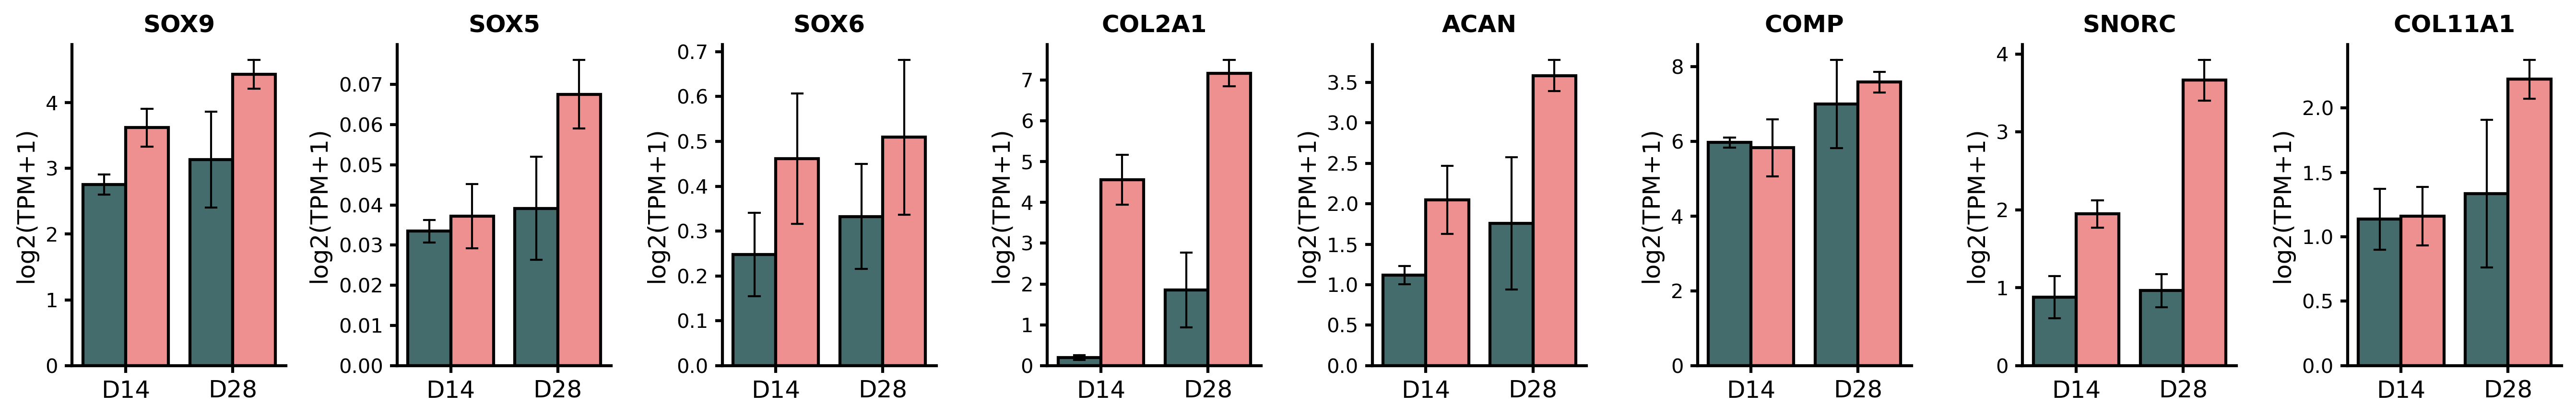

In [51]:
cdf = ["SOX9", "SOX5", "SOX6", "COL2A1", "ACAN", "COMP", "SNORC", "COL11A1"]

plt.rcParams['figure.dpi'] = 300
plt.figure(figsize=(18, 3))

plot_genes(cdf, 8, df)

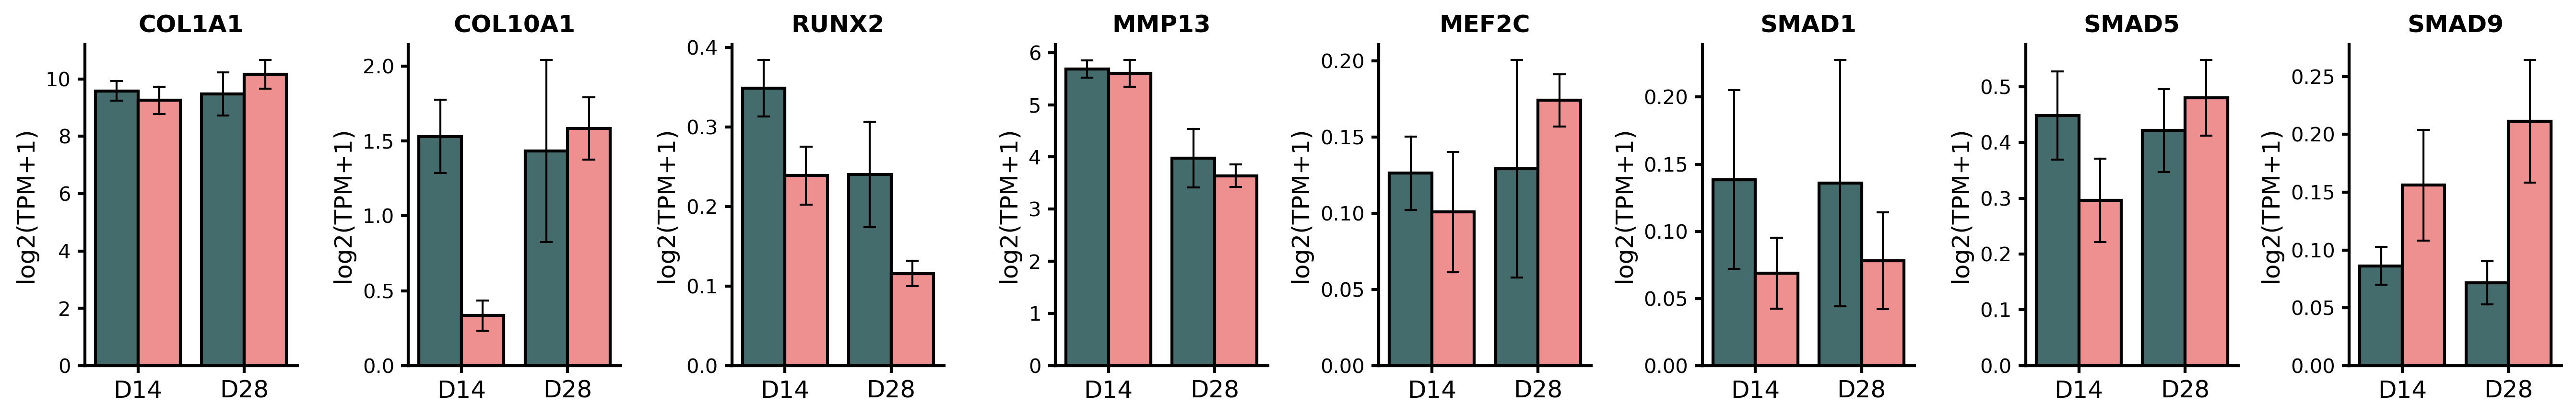

In [55]:
hdf = ["COL1A1", "COL10A1", "RUNX2", "MMP13", "MEF2C", "SMAD1", "SMAD5", "SMAD9"]

plt.rcParams['figure.dpi'] = 300
plt.figure(figsize=(18, 3))

plot_genes(hdf, 8, df)